# Retail Price Optimization with Machine Learning

Retail price optimization helps determine the ideal price to maximize revenue and profit. Using machine learning, this project analyzes historical pricing and sales data to predict optimal prices, providing businesses with data-driven insights for effective pricing strategies. You can download the dataset for this project from [here](https://statso.io/retail-price-optimization-case-study/).



In [2]:
import pandas as pd
pd.set_option("display.max_columns" ,50)
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize

from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

In [3]:
df = pd.read_csv("retail_price.csv")

In [4]:
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,weekday,weekend,holiday,month,year,s,volume,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,350,4.0,57,23,8,1,5,2017,10.267394,3800,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,350,4.0,61,22,8,1,6,2017,6.503115,3800,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,350,4.0,123,21,10,1,7,2017,12.071651,3800,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,350,4.0,90,23,8,1,8,2017,9.293873,3800,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,350,4.0,54,21,9,1,9,2017,5.555556,3800,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [5]:
df.isnull().sum()

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

In [6]:
df.describe()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,weekday,weekend,holiday,month,year,s,volume,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,81.028107,21.773669,8.658284,1.494083,6.192308,2017.525148,14.644970,10664.627219,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,62.055560,0.986104,0.705600,0.940430,3.243455,0.499737,11.930276,9172.801850,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,20.000000,8.000000,0.000000,1.000000,2017.000000,0.484262,640.000000,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,21.000000,8.000000,1.000000,3.000000,2017.000000,7.510204,3510.000000,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,22.000000,9.000000,1.000000,6.000000,2018.000000,11.316760,8000.000000,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,116.000000,23.000000,9.000000,2.000000,8.000000,2018.000000,17.745704,15750.000000,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,339.000000,23.000000,10.000000,4.000000,12.000000,2018.000000,100.000000,32736.000000,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


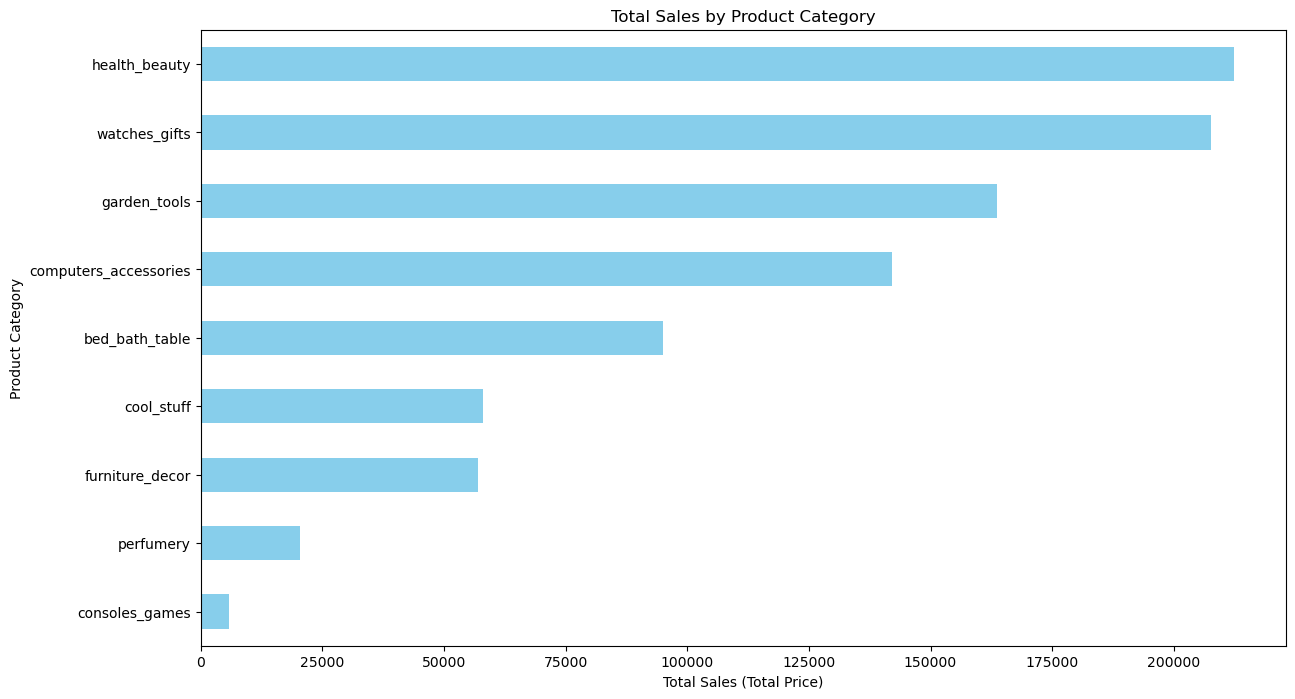

In [18]:
plt.figure(figsize=(14, 8))
category_sales = df.groupby('product_category_name')['total_price'].sum().sort_values()
category_sales.plot(kind='barh', color='skyblue')
plt.title("Total Sales by Product Category")
plt.xlabel("Total Sales (Total Price)")
plt.ylabel("Product Category")
plt.show()

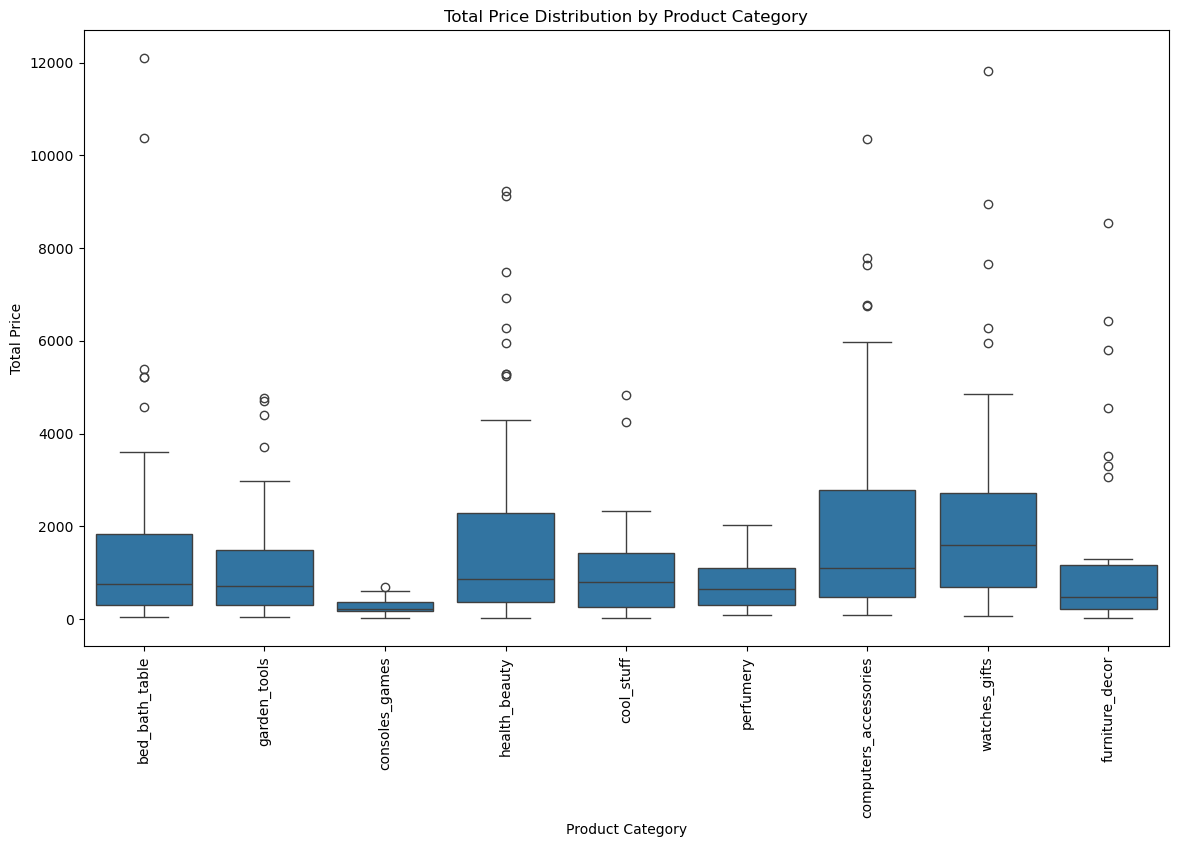

In [20]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='product_category_name', y='total_price')
plt.title("Total Price Distribution by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Price")
plt.xticks(rotation=90)
plt.show()

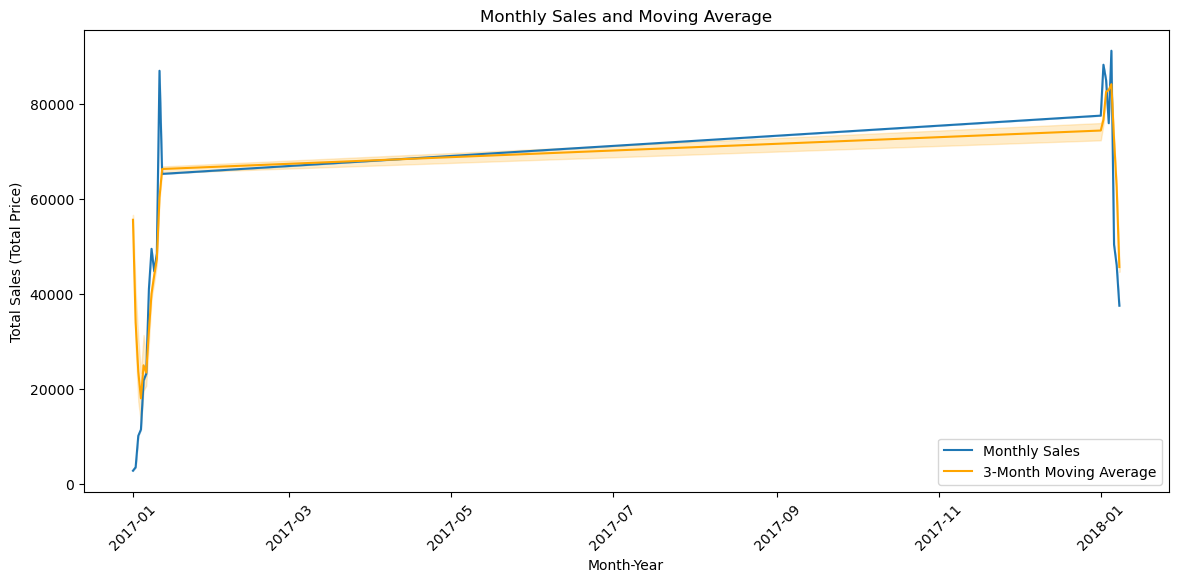

In [22]:
df['monthly_sales'] = df.groupby('month_year')['total_price'].transform('sum')
df['moving_average'] = df['monthly_sales'].rolling(window=3).mean()  # 3 aylık hareketli ortalama

plt.figure(figsize=(14, 6))
sns.lineplot(x=df['month_year'], y=df['monthly_sales'], label="Monthly Sales")
sns.lineplot(x=df['month_year'], y=df['moving_average'], label="3-Month Moving Average", color="orange")
plt.title("Monthly Sales and Moving Average")
plt.xlabel("Month-Year")
plt.ylabel("Total Sales (Total Price)")
plt.xticks(rotation=45)
plt.legend()
plt.show()


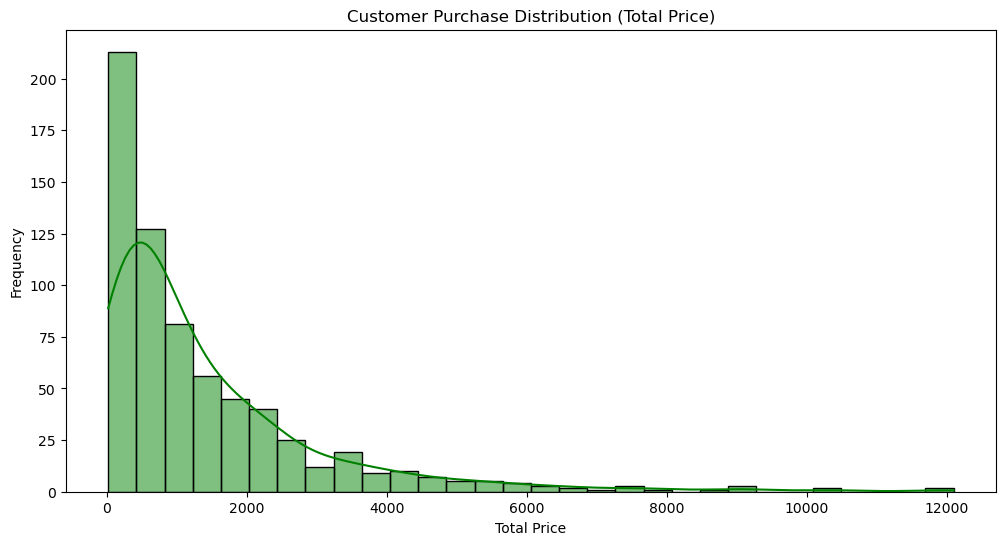

In [24]:
plt.figure(figsize=(12, 6))
sns.histplot(df['total_price'], kde=True, bins=30, color='green')
plt.title("Customer Purchase Distribution (Total Price)")
plt.xlabel("Total Price")
plt.ylabel("Frequency")
plt.show()


In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True),annot= True, cmap="crest")

In [ ]:
abs(df.corr(numeric_only=True)["total_price"].sort_values(ascending=False))

In [ ]:
x= df[["qty","lag_price","unit_price","customers","s","comp_2"]]
y= df["total_price"]

In [ ]:
x_train , x_test, y_train, y_test= train_test_split(x,y, test_size=.20, random_state=42)

In [ ]:
def algo_test(x,y):
        # define all models
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        # Create a dataframe to compile error and accuracy rates
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        # Place my accuracy and error rates into the table named 'result'
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
        # Return the 'result' table sorted by accuracy rate (r2_score)
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [ ]:
def algo_test(x,y):
        # define all models
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        # Create a dataframe to compile error and accuracy rates
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        # Place my accuracy and error rates into the table named 'result'
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
        # Return the 'result' table sorted by accuracy rate (r2_score)
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [ ]:
algo_test(x,y)

## Conclusion

Based on the evaluation metrics, **Gradient Boosting** emerged as the best-performing model, achieving a high \( R^2 \) of 0.961, with the lowest RMSE (350.14) and MAE (121.47) among all models. This indicates that Gradient Boosting effectively captures the variance in the data and provides accurate predictions with minimal error.

Given its strong performance across all metrics, Gradient Boosting is recommended as the primary model for this dataset. Its ability to generalize well makes it suitable for complex relationships within the data. Additional tuning or feature engineering may further enhance its predictive power, but it already stands out as the most reliable model choice.
